# Principal Component Analysis

In [47]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import os
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [29]:
os.chdir(r"D:\Datasets")

`milk`

In [14]:
milk = pd.read_csv("milk.csv",index_col = 0)
scaler = StandardScaler().set_output(transform = 'pandas')
milk_scaled = scaler.fit_transform(milk)

In [15]:
prcomp = PCA().set_output(transform = 'pandas')
pc_data = prcomp.fit_transform(milk_scaled)
pc_data.var()

pca0    4.040412
pca1    0.924372
pca2    0.134291
pca3    0.102689
pca4    0.006570
dtype: float64

In [16]:
eigen_val,eigen_vec = np.linalg.eig(milk_scaled.cov())

In [17]:
eigen_val

array([4.0404117 , 0.92437238, 0.00656977, 0.13429088, 0.1026886 ])

In [18]:
#PC = eigen vector, var(PC)= eigen val

In [ ]:
# model=pca()
# result=model.fit_transform(df_scaled,col_labels=df.columns,row_labels=list(df.index))
# model.biplot(label=True,legend=True)
# plt.gca().set_facecolor('white')
# for i in range(len(df)):
#     plt.text(pca_values.values[i,0],pca_values.values[i,1],list(df.index)[i],color='black')
#
# plt.show()

`visconsin`

In [35]:
wisconsin = pd.read_csv(r"D:\Cases\Wisconsin\BreastCancer.csv",index_col = 0)

In [36]:
y = wisconsin['Class']
x = wisconsin.drop('Class',axis = 1)

In [37]:
prcomp = PCA().set_output(transform = 'pandas')
x_pca = prcomp.fit_transform(X)
x.shape,x_pca.shape

((699, 9), (699, 9))

In [38]:
x_pca

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8
Code,,,,,,,,,
61634,-1.578410,-1.250952,1.697742,0.419386,-0.627084,-0.357586,-1.309625,-0.512075,1.022756
63375,6.685459,4.121834,0.712446,4.106721,4.713119,-0.050167,2.508791,1.202568,-0.749758
76389,4.899082,4.102293,5.168775,-0.540668,-1.220417,-1.799109,0.438180,-1.786111,-1.680400
95719,16.593063,-1.952937,-3.776265,-0.660587,0.611660,2.963865,-0.588300,-1.297223,-0.189840
128059,-3.294449,2.838637,-2.187085,1.473148,-1.543565,-0.322474,2.338005,-0.676226,0.045585
...,...,...,...,...,...,...,...,...,...
1369821,17.913217,-1.209653,-0.541525,-0.221729,2.606830,0.043363,1.049566,-3.714491,-0.076875
1371026,12.785727,1.351164,-3.484572,-2.186253,-0.617230,-0.523438,-3.844963,-2.055706,0.377406
1371920,-4.081265,-0.575422,1.596055,0.597004,1.069875,-0.605745,0.894851,0.130720,0.011156


In [39]:
np.cumsum(prcomp.explained_variance_ratio_)*100

array([ 68.92148641,  76.17490546,  82.27277194,  86.70847108,
        90.60818755,  94.06577109,  96.59348125,  98.86016534,
       100.        ])

<Axes: xlabel='pca0', ylabel='pca1'>

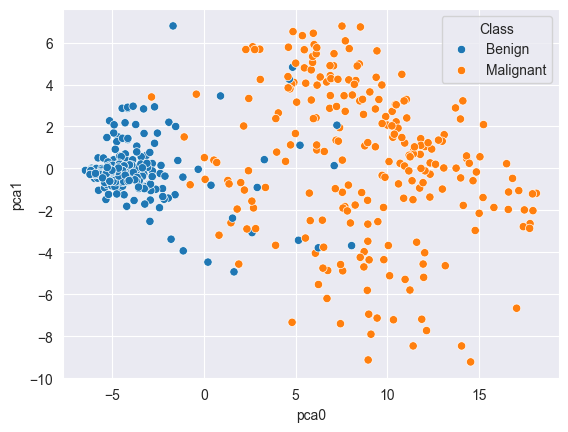

In [41]:
pc_data = x_pca.copy()
pc_data['Class'] = y
sns.scatterplot(data = pc_data,x= 'pca0',y = 'pca1',hue = 'Class')

In [42]:
# #pca-> supervised = good results
# `sonar`
# `wisconsin`

`HR`

In [ ]:
df = pd.read_csv(r"D:\HR_comma_sep.csv")
df.head()

X_train, X_test, y_train, y_test = model_selection.train_test_split(df.drop('left', axis=1), df['left'])
ohe = preprocessing.OneHotEncoder(sparse_output=False, drop='first')
trns = compose.make_column_transformer((ohe, compose.make_column_selector(dtype_include='object')),
                                       remainder='passthrough', verbose_feature_names_out=False)
trns = trns.set_output(transform='pandas')
scaler = StandardScaler().set_output(transform='pandas')
prcomp = PCA().set_output(transform='pandas')
svc = SVC()
comps = np.arange(2, 16)
scores = []
for c in comps:
    prcomp = PCA(n_components=c).set_output(transform='pandas')
    pipe = pipeline.Pipeline(steps=[
        ("OHE", trns),
        ("SCL", scaler),
        ('PCA', prcomp),
        ("classifier", svc)
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    scores.append([c, accuracy_score(y_test, y_pred)])

df_scores = pd.DataFrame(data=scores, columns=['n_components', 'accuracy_score'])
df_scores.sort_values(by=["n_components", 'accuracy_score'], ascending=[False, True])

# K-Fold Cross Validation

In [ ]:
pizza = pd.read_csv('pizza.csv')
x = pizza[]
y =

`Breast Cancer`

In [45]:
wisconsin = pd.read_csv(r"D:\Cases\Wisconsin\BreastCancer.csv",index_col = 0)
y = wisconsin['Class']
x = wisconsin.drop('Class',axis = 1)

In [49]:
lr = LogisticRegression()
kfold = StratifiedKFold(n_splits =5,shuffle = True, random_state = 25)
# results = cross_val_score(lr,x,y,cv = kfold)   #defaults to
results = cross_val_score(lr,x,y,cv = kfold,scoring = 'roc_auc')
results.mean()

np.float64(0.9944643791582568)

In [50]:
    results = cross_val_score(lr,x,y,cv = kfold,scoring = 'neg_log_loss')
results.mean()

np.float64(-0.09878376446090639)

In [55]:
solvers = ['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga']
Cs = np.linspace(0.11,4,2)
scores = []
for s in solvers:
    for c in Cs:
        lr = LogisticRegression(solver = s,C = c)
        results = cross_val_score(lr, x, y, cv=kfold, scoring='roc_auc')
        scores.append([s,c,results.mean()])


C:\Users\dai\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did 

In [57]:
df_scores = pd.DataFrame(scores,columns = ['solver','c','score'])
df_scores.sort_values('score',ascending = False)

,solver,c,score
6,newton-cholesky,0.11,0.994690
4,newton-cg,0.11,0.994690
0,lbfgs,0.11,0.994690
3,liblinear,4.00,0.994509
8,sag,0.11,0.994509
1,lbfgs,4.00,0.994420
7,newton-cholesky,4.00,0.994420
5,newton-cg,4.00,0.994420
9,sag,4.00,0.994147
10,saga,0.11,0.994056
